## Canny edge detection
Multi stage algorithm
1. Noise reduction - uses Gaussian blur
2. Gradient calculation - uses Sobel filter
3. Non-max suppression - 
4. Double threshold
5. Edge tracking by hysterasis

In [1]:
import numpy as np
import cv2
import sys
sys.path.append('../')
from modules.utils import cv2_to_PIL

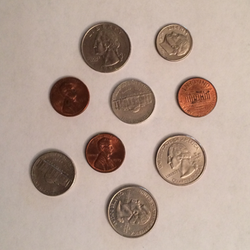

In [2]:
image = cv2.imread('../data/coins.png')
cv2_to_PIL(image)

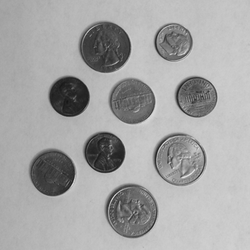

In [3]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_to_PIL(image_gray)

```cv2.Laplacian``` parameters:
- grayscale image
- data type of output image. cv2.CV_64F: 64-bit float. Using 8-bit float, causes the clipping of the data. Therefore store the data in 64-bit & later convert to 8-bit by taking the absoulte value of 64-bit

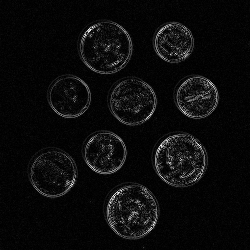

In [4]:
# Calculate the gradient magnitude
lap = cv2.Laplacian(image_gray,cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2_to_PIL(lap)

__Sobel__ to find both horizontal & vertical edges

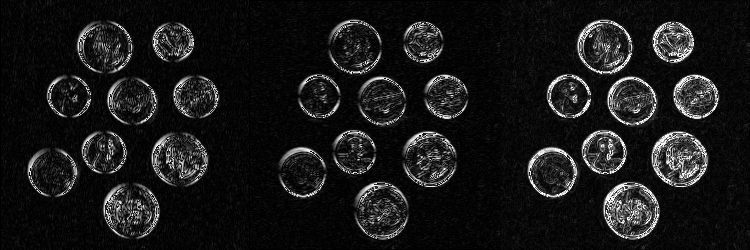

In [5]:
sobelX = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)
sobel_images = np.hstack([
    sobelX,
    sobelY,
    sobelCombined
])
cv2_to_PIL(sobel_images)

The edges in the above image are noisy. Better to use Canny edge detector

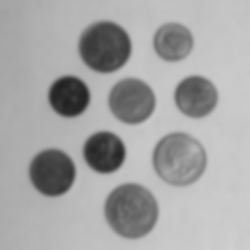

In [6]:
image_blur = cv2.GaussianBlur(image_gray, (11,11), 0)
cv2_to_PIL(image_blur)

```cv2.Canny``` parameters:
- grayscale, blu image
- threshold1: any value < threshold 1 is not an edge
- threshold2: and value > threshold2 is an edge
- values between threshold1 & threshold2 are classified as edges based on their intensity

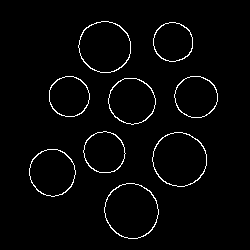

In [7]:
canny = cv2.Canny(image_blur, 30,150)
cv2_to_PIL(canny)

### Contours
- a curve of points, with no gaps in the curve.
- used for shape approximation & analysis
- Binarization & thresholding should be done before getting the contours

In [8]:
(contours, hierarchy) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

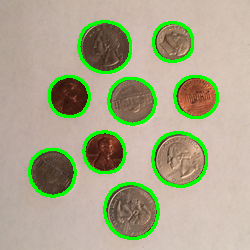

In [9]:
coins = image.copy()
cv2.drawContours(coins, contours, -1, (0, 255, 0), 2)
cv2_to_PIL(coins)